In [10]:
import pandas as pd
from fontTools.subset import subset
from pandas.io.sas.sas_constants import column_data_length_length

In [1]:
import numpy as np
import pandas as pd
dfake = pd.read_csv("../data/raw/Fake.csv")
dfake.head()

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


In [2]:
import numpy as np
import pandas as pd

dfake2 = pd.read_csv("../data/raw/Fake2.csv")
dfake2.head()

,articleID,domain,date,category,source,relation,headline,content,label,F-type
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,Reporter,Unrelated,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,Satire
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,Reporter,Unrelated,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,Satire
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,Reporter,Unrelated,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,Satire
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,Reporter,Unrelated,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,Satire
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,Reporter,Unrelated,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,Satire


In [3]:
import pandas as pd

dreal2 = pd.read_csv("../data/raw/LabeledReal.csv")
dreal2.head()

,articleID,domain,date,category,source,relation,headline,content,label
0,1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0
1,2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0
2,3,bd24live.com,2018-09-20 16:39:40,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0
3,4,bd24live.com,2018-09-19 18:27:56,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0
4,5,somoynews.tv,2018-09-20 10:15:28,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0


In [4]:
print(dfake.head())
print(dfake.info())


   articleID                    domain                        date  \
0          1         channeldhaka.news   2019-03-14T13:34:14+00:00   
1          2                 earki.com            সেম্বর ১৭, ২০১৮    
2          3                 earki.com  ২০:৩৯, জানুয়ারি ১৪, ২০১৯    
3          4         channeldhaka.news   2018-06-30T15:56:47+00:00   
4          5  motikontho.wordpress.com   2013-03-05T21:55:45+00:00   

        category                                           headline  \
0  International                           মুরগির হামলায় শেয়াল নিহত   
1  Miscellaneous            বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম   
2  Miscellaneous  বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...   
3         Sports                      অবসর নেয়ার ঘোষণা দিলেন মেসি !   
4  Miscellaneous  মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...   

                                             content  label  
0  বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...      0  
1  BTV থেকে লোকজন আসছে, ইন্ট

In [5]:
import pandas as pd
dfake = pd.read_csv("../data/raw/Fake.csv")
dfake2 = pd.read_csv("../data/raw/Fake2.csv")
dreal2 = pd.read_csv("../data/raw/LabeledReal.csv")
dfake['label'] = '0'
dfake2['label'] = '0'
dreal2['label'] = '1'
fake_data = pd.concat([dfake, dfake2], ignore_index=True)
data = pd.concat([fake_data, dreal2], ignore_index=True)


In [6]:
from sklearn.utils import shuffle
data = shuffle(data, random_state=42)


In [7]:
print(data.head())

print(data.info())
print(data['label'].value_counts())


      articleID                    domain                        date  \
532         536                 earki.com             েম্বর ২৭, ২০১৮    
872         877                 earki.com  ১৬:৩৯, জানুয়ারি ০৭, ২০১৯    
1149       1156  motikontho.wordpress.com   2014-12-22T20:35:19+00:00   
2287        993  motikontho.wordpress.com   2012-08-27T04:14:15+00:00   
4038       1475       bangla.bdnews24.com         2018-09-19 19:37:32   

           category                                           headline  \
532   Miscellaneous                            মাশরাফি, তুই হারামজাদা!   
872        Politics  বিরোধীদলের নেতা হিসেবে শপথ নেয়ার আগের রাতে এরশ...   
1149  Miscellaneous  মেডাম বাচলে জামদানী বাচবে: জাফরুল্লাহ | দৈনিক ...   
2287  Miscellaneous  ভুটানের নাগরিকত্ব নিলেন জোকাই লামা | দৈনিক মতি...   
4038       National     লালমনিরহাটে পুলিশের গুলিতে ‘মাদক ব্যবসায়ী’ আহত   

                                                content label  \
532   মাশরাফিরে! পড়লি শেষেএমপি হওয়ার লোভে!বড় বড় মান

In [9]:
print(data.columns)


Index(['articleID', 'domain', 'date', 'category', 'headline', 'content',
       'label', 'source', 'relation', 'F-type'],
      dtype='object')


In [10]:
from IPython.display import display
display(data.head())


,articleID,domain,date,category,headline,content,label,source,relation,F-type
532,536,earki.com,"েম্বর ২৭, ২০১৮",Miscellaneous,"মাশরাফি, তুই হারামজাদা!",মাশরাফিরে! পড়লি শেষেএমপি হওয়ার লোভে!বড় বড় মানু...,0,NaN,NaN,NaN
872,877,earki.com,"১৬:৩৯, জানুয়ারি ০৭, ২০১৯",Politics,বিরোধীদলের নেতা হিসেবে শপথ নেয়ার আগের রাতে এরশ...,একাদশ জাতীয় সংসদে বিজয়ী মহাজোটের শরিক হিসেবে র...,0,NaN,NaN,NaN
1149,1156,motikontho.wordpress.com,2014-12-22T20:35:19+00:00,Miscellaneous,মেডাম বাচলে জামদানী বাচবে: জাফরুল্লাহ | দৈনিক ...,বৃহত্তর জামায়াতে ইসলামীর বিএনপি শাখার মহিলা আম...,0,NaN,NaN,NaN
2287,993,motikontho.wordpress.com,2012-08-27T04:14:15+00:00,Miscellaneous,ভুটানের নাগরিকত্ব নিলেন জোকাই লামা | দৈনিক মতি...,থিম্ফু মতিনিধি। উপমহাদেশের বিখ্যাত আলেম ও সম্প...,0,Reporter,Unrelated,Satire
4038,1475,bangla.bdnews24.com,2018-09-19 19:37:32,National,লালমনিরহাটে পুলিশের গুলিতে ‘মাদক ব্যবসায়ী’ আহত,"হাতীবান্ধা থানার ওসি ওমর ফারুক জানান, বুধবার ব...",1,হাতীবান্ধা থানার ওসি ওমর ফারুক,Related,NaN


In [11]:
import pandas
display(data.tail())
data = data.drop(columns=['relation'], errors='ignore')
data =  data.dropna(subset=["content"])
print(data)

,articleID,domain,date,category,headline,content,label,source,relation,F-type
5734,3330,risingbd.com,2018-09-19 23:16:46,Sports,"অবিশ্বাস্য ব্যাটিং হংকংয়ের, ম্যাচ জিতল ভারত",ক্রীড়া ডেস্ক: এশিয়া কাপের মঞ্চে ভারতকে হারানোর...,1,Reporter,Related,NaN
5191,2730,somoynews.tv,2018-09-21 20:25:45,Sports,"আম্পায়ার ফেরালেন মাহমুদুল্লাহকে, নিজেকে বিলিয়ে...",আবারো আম্পায়ারের ভুল সিদ্ধান্ত গেল বাংলাদেশের ...,1,reporter,Related,NaN
5390,2948,channelionline.com,2018-09-21 15:37:41,International,সার্ক সম্মেলন আয়োজনে পাকিস্তানের প্রস্তাব খারি...,পাকিস্তানের রাজধানী ইসলামাবাদে সার্ক সম্মেলন আ...,1,ভারতের পররাষ্ট্র মন্ত্রণালয়ের মুখপাত্র,Related,NaN
860,865,bengalbeats.com,2019-05-27T18:12:01+00:00,Miscellaneous,ঢাকা থেকে কুমিল্লা মাত্র ১.৩০ ঘন্টায় পৌঁছে যাও...,মেঘনা গোমতী সেতু খুলে দেওয়াতে ঢাকা থেকে মাত্র ...,0,NaN,NaN,NaN
7270,5088,bd24live.com,2018-09-19 23:51:47,National,তারা ক্যাম্পাসে কেন আসবে?,ঢাকা বিশ্ববিদ্যালয়ের ডাকসু নির্বাচনকে কেন্দ্র ...,1,ছাত্রলীগের সাবেক সাধারণ সম্পাদক,Related,NaN


      articleID                    domain                        date  \
532         536                 earki.com             েম্বর ২৭, ২০১৮    
872         877                 earki.com  ১৬:৩৯, জানুয়ারি ০৭, ২০১৯    
1149       1156  motikontho.wordpress.com   2014-12-22T20:35:19+00:00   
2287        993  motikontho.wordpress.com   2012-08-27T04:14:15+00:00   
4038       1475       bangla.bdnews24.com         2018-09-19 19:37:32   
...         ...                       ...                         ...   
5734       3330              risingbd.com         2018-09-19 23:16:46   
5191       2730              somoynews.tv         2018-09-21 20:25:45   
5390       2948        channelionline.com         2018-09-21 15:37:41   
860         865           bengalbeats.com   2019-05-27T18:12:01+00:00   
7270       5088              bd24live.com         2018-09-19 23:51:47   

           category                                           headline  \
532   Miscellaneous                            মা

In [12]:
\


import pandas as pd
import os

raw_folder = '../data/raw/'
raw_files = [f for f in os.listdir(raw_folder) if f.endswith('.csv')]
data_list = [pd.read_csv(os.path.join(raw_folder, f)) for f in raw_files]
data = pd.concat(data_list, ignore_index=True)

data['text'] = data['headline'] + " " + data['content']
data = data.drop_duplicates(subset='text')
data.head()
processed_data =data.copy()
processed_data = processed_data.drop(columns=['headline', 'content', 'relation', 'F-type'], errors='ignore')
processed_data= processed_data.dropna(subset=["text"])
from sklearn.utils import shuffle
processed_data = shuffle(processed_data, random_state=42).reset_index(drop=True)

processed_data.head()

,articleID,domain,date,category,label,source,text
0,2694,somoynews.tv,2018-09-22 14:27:07,Sports,1.0,ব্রাজিল কোচ,ব্রাজিলিয়ান ফুটবল কনফেডারেশনের দল ঘোষণা সৌদি আ...
1,6132,jagonews24.com,2018-09-19 11:31:00,Sports,1.0,reporter,"ভারতের দুই পরিবর্তন, পাকিস্তান একাদশে চার পেসা..."
2,7615,independent24.com,2018-10-10 12:30:31,National,1.0,reporter,আবারও নৌকা মার্কায় ভোট চাইলেন নেতারা উন্নয়নের ...
3,4588,jugantor.com,2018-09-20 22:44:24,Editorial,1.0,হোসেনপুর সার্কেলের অতিরিক্ত পুলিশ সুপার,হোসেনপুরে প্রেমে সারা না দেয়ায় স্কুলছাত্রীর চু...
4,4379,jagonews24.com,2018-09-19 13:38:00,Politics,1.0,স্বরাষ্ট্রমন্ত্রী,বাংলাদেশের পাসপোর্টে রোহিঙ্গাদের বিদেশ যাওয়ার ...


In [13]:
print("Shape:", processed_data.shape)


Shape: (8501, 7)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

bangla_stopwords = ['এবং', 'কিন্তু', 'তবে', 'হয়', 'না', 'যদি', 'ও', 'কি', 'হবে', 'আমরা', 'সে', 'তারা', 'আমি', 'তুমি', 'থেকে', 'এর', 'এই']

vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words=bangla_stopwords,
    max_df=0.95,
    min_df=5
)

X = vectorizer.fit_transform(processed_data['text'])
y = processed_data['label']


In [18]:

!pip install banglanltk
from bnltk.tokenize import BNWordTokenizer
from bnltk.stemmer import BanglaStemmer
from bnltk.corpus import stopwords

Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'bnltk'

In [16]:
bangla_stopwords = [
'অবশ্য','অনেক','অনেকে','অনেকেই','অন্তত','অন্য','আজ','আছে','আপনার','আপনি',
'আবার','আমরা','আমাকে','আমাদের','আমার','আমি','আরও','আর','আগে','আগেই','আই',
'অতএব','আগামী','অবধি','অনুযায়ী','আদ্যভাগে','এই','একই','একে','একটি','এখন',
'এখনও','এখানে','এখানেই','এটি','এটা','এটাই','এতটাই','এবং','একবার','এবার',
'এদের','এঁদের','এমন','এমনকী','এল','এর','এরা','এঁরা','এস','এতে','এসে','এ',
'ঐ','ই','ইহা','ইত্যাদি','উনি','উপর','উপরে','উচিত','ও','ওই','ওর','ওরা','ওঁর',
'ওঁরা','ওকে','ওদের','ওঁদের','ওখানে','কত','কবে','করতে','কয়েক','কয়েকটি','করবে',
'করলেন','করার','কারও','করা','করি','করিয়ে','করাই','করলে','করিতে','করিয়া','করেছিলেন',
'করছে','করছেন','করেছেন','করেছে','করেন','করবেন','করায়','করে','করেই','কাছ','কাছে',
'কাজে','কারণ','কিছু','কিছুই','কিন্তু','কিংবা','কি','কী','কেউ','কেউই','কাউকে','কেন',
'কে','কোনও','কোনো','কোন','কখনও','ক্ষেত্রে','খুব','গুলি','গিয়ে','গিয়েছে','গেছে',
'গেল','গেলে','গোটা','চলে','ছাড়া','ছাড়াও','ছিলেন','ছিল','জন্য','জানা','ঠিক','তিনি',
'তিনঐ','তিনিও','তখন','তবে','তবু','তাঁদের','তাঁরা','তাঁর','তাঁকে','তাই','তেমন','তাকে',
'তাহা','তাহাতে','তাহার','তাদের','তারপর','তারা','তার','তাহলে','তা','তাও','তাতে','তো',
'তত','তুমি','তোমার','তথা','থাকে','থাকা','থাকায়','থেকে','থেকেও','থাকবে','থাকেন',
'থাকবেন','থেকেই','দিকে','দিতে','দিয়ে','দিয়েছে','দিয়েছেন','দিলেন','দু','দুটি','দুটো',
'দেয়','দেওয়া','দেওয়ার','দেখা','দেখে','দেখতে','দ্বারা','ধরে','ধরা','নয়','নানা','না',
'নাকি','নাগাদ','নিতে','নিজে','নিজেই','নিজের','নিজেদের','নিয়ে','নেওয়া','নেওয়ার','নেই',
'নাই','পক্ষে','পর্যন্ত','পাওয়া','পারেন','পারি','পারে','পরে','পরেই','পরেও','পর','পেয়ে',
'প্রতি','প্রভৃতি','প্রায়','ফের','ফলে','ব্যবহার','বলতে','বললেন','বলেছেন','বলল','বলা',
'বলেন','বলে','বহু','বসে','বার','বা','বিনা','বরং','বদলে','বাদে','বিশেষ','বিভিন্ন',
'বিষয়টি','ব্যাপারে','ভাবে','ভাবেই','মধ্যে','মধ্যেই','মধ্যেও','মধ্যভাগে','মাধ্যমে','মাত্র',
'মতো','মতোই','মোটেই','যখন','যদি','যদিও','যাবে','যায়','যাকে','যাওয়া','যাওয়ার','যত',
'যতটা','যা','যার','যারা','যাঁর','যাঁরা','যাদের','যান','যাচ্ছে','যেতে','যাতে','যেন','যেমন',
'যেখানে','যিনি','যে','রেখে','রাখা','রয়েছে','রকম','শুধু','সঙ্গে','সঙ্গেও','সমস্ত','সব',
'সবার','সহ','সুতরাং','সহিত','সেই','সেটা','সেটি','সেটাই','সেটাও','সম্প্রতি','সেখান',
'সেখানে','সে','স্পষ্ট','স্বয়ং','হইতে','হইবে','হৈলে','হইয়া','হচ্ছে','হত','হতে','হতেই',
'হবে','হবেন','হয়েছিল','হয়েছে','হয়েছেন','হয়ে','হয়নি','হয়','হয়েই','হয়তো','হল','হলে',
'হলেই','হলেও','হলো','হিসাবে','হওয়া','হওয়ার','হওয়ায়','হন','হোক','জন','জনকে','জনের',
'জানতে','জানায়','জানিয়ে','জানানো','জানিয়েছে','জন্য','জন্যওজে','জে','বেশ','দেন','তুলে',
'ছিলেন','চান','চায়','চেয়ে','মোট','যথেষ্ট','টি','অনুযায়ী','উত্তর','কমনে','প্রথম','প্রযন্ত',
'প্রাথমিক','মনে','নতুন','পি','পেয়্র্','বক্তব্য','ধামার','সি','সাধারণ','সামনে','হাজার'
]
!pip install bangla-stemmer
import pandas as pd
import re
from bangla_stemmer.stemmer import stemmer
import sys
import io
import string

def suppress_stdout(func, *args, **kwargs):
    old_stdout = sys.stdout
    sys.stdout = io.StringIO()  # redirect prints to a dummy buffer
    try:
        result = func(*args, **kwargs)
    finally:
        sys.stdout = old_stdout
    return result


def clean_bangla_text(text):
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_and_stem(text):
    words = text.split()
    stmr = stemmer.BanglaStemmer()
    tokens = [suppress_stdout(stmr.stem, w) for w in words if w not in bangla_stopwords]
    return ' '.join(tokens)
#for fine-tuning data processing
def simple_bangla_stem(word):
    suffixes = ["গুলো", "দের", "মতো", "গুলোই", "টিতে", "টার", "রা", "টি", "টা", "তে", "র", "রা", "এর", "ই", "ও"]
    for suf in sorted(suffixes, key=len, reverse=True):
        if word.endswith(suf) and len(word) > len(suf) + 1:
            return word[:-len(suf)]
    return word

bangla_normalization_dict = {
    "মুরগি": "মুরগি",
    "মুরগী": "মুরগি",
    "মুরগীটা": "মুরগি",
    "মুরগিটা": "মুরগি",
    "মুরগিগুলো": "মুরগি",

    "শিয়াল": "শিয়াল",
    "শেয়াল": "শিয়াল",
    "শিয়াল": "শিয়াল",

    "মানুষ": "মানুষ",
    "মাঞ্জুষ": "মানুষ",
    "মানুষটা": "মানুষ",

"ইন্টারভিউ": "ইন্টারভিউ",
    "ক্যামেরাম্যান": "ক্যামেরাম্যান",
    "মডেল": "মডেল",
    "টিম": "টিম",
    "বস": "বস",
    "ভিডি": "ভিডিও",
    "ফরান্স": "ফ্রান্স",

    "খাচ্ছে": "খাওয়া",
    "খাচ্ছেন": "খাওয়া",
    "খায়": "খাওয়া",
    "খেতে": "খাওয়া",
    "খেয়েছে": "খাওয়া",

    "দেয়": "দেওয়া",
    "দিচ্ছে": "দেওয়া",
    "দিয়েছে": "দেওয়া",

    "কিন্তু": "কিন্তু",
    "কিংবা": "কিন্তু",
    "এবং": "এবং",
    "আরও": "আরও",

    "একটি": "এক",
    "এক": "এক",
    "দুইটি": "দুই",
    "দুই": "দুই",
}

def preprocess_bangla_text(text):
    text = str(text)


    text = re.sub(r"<.*?>|http\S+|www\S+|\S*@\S*|\#\S*", " ", text)  # removing HTML, URLs, emails, hashtags
    text = re.sub(r"[a-zA-Z০-৯0-9]+", " ", text)
    punct_pattern = f"[{string.punctuation}।॥‘’“”—৳]"
    text = re.sub(punct_pattern, " ", text)
    text = re.sub("[য়য়]", "য়", text)
    text = re.sub("[ঋৃ]", "ঋ", text)
    text = re.sub("[ঁ্]", "", text)
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces

    # Removing repeated consecutive words
    words = text.split()
    words = [words[i] for i in range(len(words)) if i == 0 or words[i] != words[i-1]]

    # Normalizing words our using dictionary
    words = [bangla_normalization_dict.get(w, w) for w in words]

    #  Removing stopwords using our list
    words = [w for w in words if w not in bangla_stopwords]


    words = [simple_bangla_stem(w) for w in words]

    return " ".join(words)


processed_data = pd.read_csv("processed_data.csv")

processed_data['processed_text'] = processed_data['text'].apply(preprocess_bangla_text)

for original, processed in zip(processed_data['text'][:2], processed_data['processed_text'][:2]):
    print("Original:", original)
    print("Processed:", processed)
    print("-" * 50)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Original: মুরগির হামলায় শেয়াল নিহত বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্গা দেওয়া। প্রবাদটা এজন্য বলা হয় যে, শিয়ালের কাজই হলো মুরগী খেয়ে ফেলা। শেয়ালের কাছ থেকে মুরগী কখনো নিজেকে রক্ষা করতে পারেনা।তবে ফ্রান্সের এক বিশ্ববিদ্যালয়ের শিক্ষক-শিক্ষার্থীরা জানাচ্ছে, এবার এক আশ্চর্য্যজনক ঘটনা ঘটছে। মুরগীর হামলায় শিয়াল মারা গেছে।ঘটনাটি গত সপ্তাহের, ফ্রান্সের উত্তর-পূর্বাঞ্চলের বুতানিয়া এলাকার একটি কৃষিবিষয়ক বিদ্যালয়ে। ওই বিদ্যালয়ে একটি মুরগির খামার রয়েছে। মুরগির ঘরের এক কোনায় সকালে মৃত একটি শিয়াল পড়ে থাকতে দেখে শিক্ষার্থীরা।৬ হাজার মুরগি রয়েছে খামারটিতে। শিয়ালটির মৃতদেহ যেখানে পাওয়া গেছে, সেখানে তিন হাজার মুরগি ছিল। মুরগিগুলো সারা দিন বাইরে চরে বেড়ায়। সন্ধ্যা হলে নিজ থেকে ঘরে উঠে আসে। সূর্য ডুবে গেলেই দরজা বন্ধ হয়ে যায় স্বয়ংক্রিয়ভাবে।স্থানীয় বন্য প্রাণী বিশেষজ্ঞরা জানিয়েছেন, এই ঘটনায় তাঁরা অবাক। শিয়ালটি বাচ্চা ও অনভিজ্ঞ ছিল। এতগুলো মুরগির সামনে পড়ে সে সম্ভবত ভড়কে গিয়েছিল।Source- BBC Bangla
Processed: মুরগি হামল

In [15]:
import pandas as pd
from collections import Counter


print(processed_data['label'].value_counts())





label
1    7202
0    1299
Name: count, dtype: int64


In [25]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [19]:
import os
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from collections import Counter


X_text = processed_data['text']
y = processed_data['label']


X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF feature shape:", X_train_tfidf.shape)
print("First 20 features:", vectorizer.get_feature_names_out()[:20])

# Saving the vectorizer AFTER creating it
os.makedirs("vectorizer", exist_ok=True)
with open("vectorizer/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
print("Vectorizer saved successfully!")

# Handling imbalanced data
smk = SMOTETomek(random_state=42)
X_resampled, y_resampled = smk.fit_resample(X_train_tfidf, y_train)

print("Original train label distribution:", Counter(y_train))
print("Resampled train label distribution:", Counter(y_resampled))


TF-IDF feature shape: (6800, 5000)
First 20 features: ['adsbygoogle' 'beats' 'bengal' 'bengal beats' 'com' 'eআরক' 'of'
 'sharetweet' 'the' 'অক' 'অক বর' 'অক ষর' 'অগ' 'অগ রগত' 'অঙ' 'অচ' 'অজ' 'অঞ'
 'অঞ চল' 'অট']
Vectorizer saved successfully!
Original train label distribution: Counter({1: 5761, 0: 1039})
Resampled train label distribution: Counter({1: 5760, 0: 5760})


In [20]:

print(os.listdir("vectorizer"))

with open("vectorizer/tfidf_vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

print(type(loaded_vectorizer))


['tfidf_vectorizer.pkl']
<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [21]:
# Load the vectorizer
import pickle

with open("vectorizer/tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

X = vectorizer.transform(processed_data['processed_text'])
y = processed_data['label']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
#logistoc regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

logreg.fit(X_resampled, y_resampled)

y_pred = logreg.predict(X_test_tfidf)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred))


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       260
           1       0.97      0.95      0.96      1441

    accuracy                           0.93      1701
   macro avg       0.86      0.90      0.88      1701
weighted avg       0.94      0.93      0.94      1701



In [25]:
import os
import pickle

# Creating folders
os.makedirs("vectorizer", exist_ok=True)
os.makedirs("models", exist_ok=True)

# Saving TF-IDF vectorizer
with open("vectorizer/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
print("Vectorizer saved successfully!")

# Saving Logistic Regression model
with open("models/logistic_regression_model.pkl", "wb") as f:
    pickle.dump(logreg, f)
print("Logistic Regression model saved successfully!")


Vectorizer saved successfully!
Logistic Regression model saved successfully!


In [27]:
#testing
import pickle

# Load vectorizer and model
with open("vectorizer/tfidf_vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

with open("models/logistic_regression_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# new text for testing
new_text = ["আজকের খবর সত্যিই দারুন"]
new_text_tfidf = loaded_vectorizer.transform(new_text)
prediction = loaded_model.predict(new_text_tfidf)

print("Prediction:", prediction)


Prediction: [0]


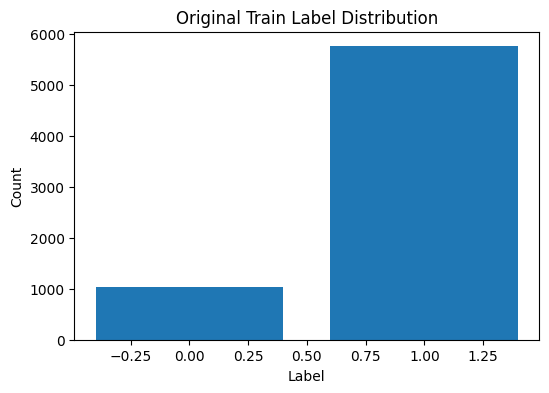

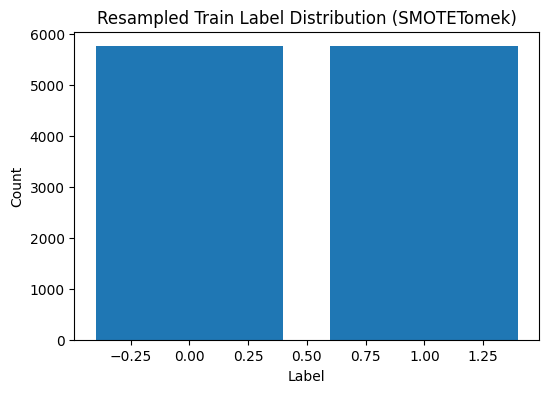

In [28]:
import matplotlib.pyplot as plt
from collections import Counter

# Original train labels
plt.figure(figsize=(6,4))
plt.bar(Counter(y_train).keys(), Counter(y_train).values())
plt.title("Original Train Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Resampled train labels
plt.figure(figsize=(6,4))
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values())
plt.title("Resampled Train Label Distribution (SMOTETomek)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


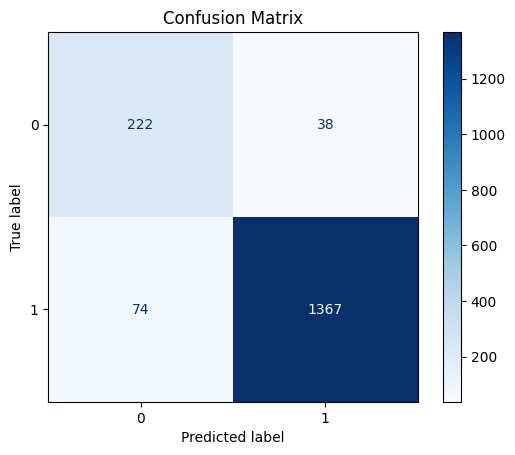

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


SVM Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       260
           1       0.97      0.97      0.97      1441

    accuracy                           0.95      1701
   macro avg       0.90      0.90      0.90      1701
weighted avg       0.95      0.95      0.95      1701



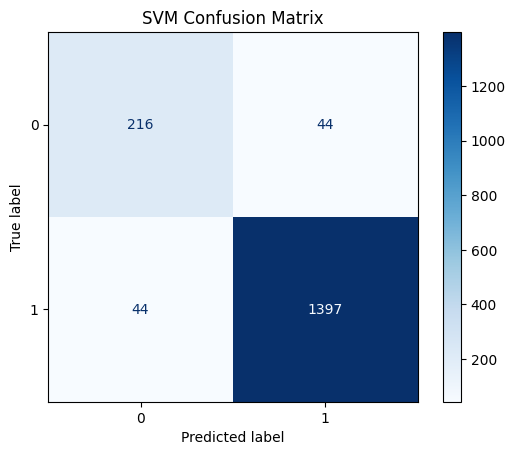

Original train label distribution: Counter({1: 5761, 0: 1039})
Resampled train label distribution: Counter({1: 5760, 0: 5760})


In [33]:
#SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter


svm_model = LinearSVC(class_weight='balanced', max_iter=5000, random_state=42)

# Train on resampled training data
svm_model.fit(X_resampled, y_resampled)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_tfidf)


print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

# label distribution checkig
print("Original train label distribution:", Counter(y_train))
print("Resampled train label distribution:", Counter(y_resampled))


In [35]:
!pip install transformers datasets torch


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.0 MB 3.6 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.0 MB 4.1 MB/s eta 0:00:03
   ----------- ---------------------------- 3.4/12.0 MB 4.4 MB/s eta 0:00:02
   -------------- ------------------------- 4.5/12.0 MB 4.5 MB/s eta 0:00:02
   ------------------ --------------------- 5.5/12.0 MB 4.6 MB/s eta 0:00:02
   --------------------- ------------------ 6.6/12.0 MB 4.7 MB/s eta 0:00:02
   --------------------------- ------------ 8.4/12.0 MB 5.2 MB/s eta 0:00:01
   ------------------------------ --------- 9.2/12.0 MB 5.2 MB/s eta 0:00:01
   ---------------------------------- ----- 10.2/12.0 MB 5.1 MB/s eta 0:00:01
   ------------------------------------ --- 11.0/12.0 MB 5.1 MB/s eta 0:00:01
   -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


MODEL_NAME = "sagorsarker/bangla-bert-base"  # Bangla BERT
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)  # 2 classes: fake / real


C:\Users\User\AppData\Roaming\Python\Python314\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--sagorsarker--bangla-bert-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In or

In [37]:
from torch.utils.data import Dataset

class BanglaNewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [41]:
import pandas as pd

processed_data = pd.read_csv("processed_data.csv")
print(processed_data.columns)


Index(['articleID', 'domain', 'date', 'category', 'label', 'source', 'F-type',
       'text'],
      dtype='object')


In [42]:
# Step 0: Imports
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import AdamW

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

processed_data = pd.read_csv("processed_data.csv")

X_train, X_test, y_train, y_test = train_test_split(
    processed_data['text'],
    processed_data['label'],
    test_size=0.2,
    random_state=42,
    stratify=processed_data['label']
)

#  Bangla BERT
MODEL_NAME = "sagorsarker/bangla-bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

class BanglaNewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


train_dataset = BanglaNewsDataset(X_train, y_train, tokenizer)
test_dataset = BanglaNewsDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


optimizer = AdamW(model.parameters(), lr=2e-5)


epochs = 2

for epoch in range(epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        loop.set_description(f'Epoch {epoch+1}')
        loop.set_postfix(loss=loss.item())


model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

print("Classification Report on Test Set:")
print(classification_report(y_true, y_pred))

#  Saving the fine-tuned model
model.save_pretrained("bangla_bert_fake_news")
tokenizer.save_pretrained("bangla_bert_fake_news")

print("✅ Bangla BERT model and tokenizer saved successfully!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 2: 100%|██████████| 425/425 [30:05<00:00,  4.25s/it, loss=0.00531] 


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       260
           1       0.97      0.98      0.97      1441

    accuracy                           0.96      1701
   macro avg       0.93      0.90      0.91      1701
weighted avg       0.95      0.96      0.95      1701

✅ Bangla BERT model and tokenizer saved successfully!


In [43]:
model.save_pretrained("bangla_bert_fake_news")
tokenizer.save_pretrained("bangla_bert_fake_news")


('bangla_bert_fake_news\\tokenizer_config.json',
 'bangla_bert_fake_news\\special_tokens_map.json',
 'bangla_bert_fake_news\\vocab.txt',
 'bangla_bert_fake_news\\added_tokens.json',
 'bangla_bert_fake_news\\tokenizer.json')